In [1]:
import pandas as pd
import altair as alt

from collections import Counter

In [104]:
alt.themes.enable(name='opaque')
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

In [2]:
file_loc = 'summer.csv.zip'
data = pd.read_csv(file_loc)

In [3]:
data.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


## 1. Find out the (male and female) athlete who won most medals in all the Summer Olympic Games (1896-2014).

In [4]:
men_name, men_count = data[data.Gender == 'Men'].Athlete.value_counts().items().__next__()
women_name, women_count = data[data.Gender == 'Women'].Athlete.value_counts().items().__next__()
print(f'Top male athlete is {men_name} with {men_count} medals, and top female is {women_name} with {women_count} medals.')

Top male athlete is PHELPS, Michael with 22 medals, and top female is LATYNINA, Larisa with 18 medals.


## 2. Display the first 10 countries that won most medals

In [5]:
men_countries = ', '.join(data[data.Gender == 'Men'].Country.value_counts()[:10].index)
women_countries = ', '.join(data[data.Gender == 'Women'].Country.value_counts()[:10].index)

In [6]:
print(f'Top countries for male are {men_countries}')
print(f'Top countries for female are {women_countries}')

Top countries for male are USA, URS, GBR, FRA, ITA, SWE, GER, HUN, AUS, JPN
Top countries for female are USA, URS, CHN, AUS, GER, GDR, RUS, NED, ROU, GBR


## 3. Use matplotlib to build line plots of the 10 most awarded countries for time span 1896-2012. Use the 10 most popular summer Olympics disciplines where most popular you can define yourself.
barplot which shows the total medals won for each sport

In [100]:
total_medals = data.Discipline.value_counts()[:10]

In [101]:
top_disciplines = data[['Year', 'Discipline', 'Country']][data.Discipline.isin(total_medals.index)]

In [106]:
top_countries = top_disciplines.Country.value_counts()[:10]
top_disciplines_countries = top_disciplines[top_disciplines.Country.isin(top_countries.index)]

In [107]:
top_disciplines_countries.head()

,Year,Discipline,Country
11,1896,Athletics,USA
13,1896,Athletics,USA
14,1896,Athletics,GER
15,1896,Athletics,USA
16,1896,Athletics,GBR


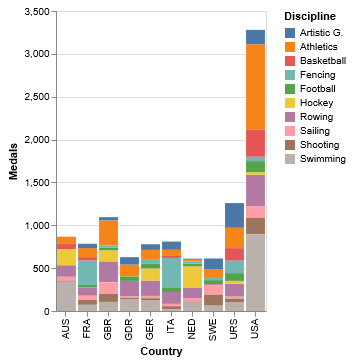

In [119]:
alt.Chart(top_disciplines_countries).mark_bar().encode(
    alt.Y('count(Discipline)', axis=alt.Axis(title='Medals')),
    alt.X('Country', axis=alt.Axis(title='Country')),
    alt.Color('Discipline')

)

## Let's look at the number of medals per country in top 10 countries in Swimming over the past 60 years

In [142]:
swimming = data[data.Discipline == 'Swimming']
swimming_past_60 = swimming[swimming.Year.isin(range(1958, 2019))]
top_10 = swimming_past_60.Country.value_counts()[:10]
swimming_past_60_countries = swimming_past_60[swimming_past_60.Country.isin(top_10.index)]

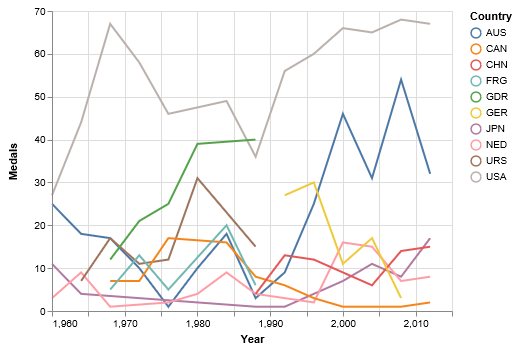

In [143]:
alt.Chart(swimming_past_60_countries).mark_line().encode(
    alt.Y('count(Discipline)', axis=alt.Axis(title='Medals')),
    alt.X('Year', axis=alt.Axis(title='Year')),
    alt.Color('Country')

)